## Homework #8 - Probability. Naive Bayes.

### Overview:
In this task, you are going to explore the next Classification Machine
Learning Algorithm - Naive Bayes. There are actually more than one
type of these algorithms, so you will get to test three of them. Naive
Bayes is a ML model that is used for data of large volumes. One of the
recommended algorithms used in these scenarios.

### Task:
For this chapter, you will have to do the following:
* Load the selected Data Set.
* Split the data set into the train and test set.
* Analyze and Preprocess your data
* Create an instance of Gaussian Naive Bayes

    (https://bit.ly/3DTv0fu)
* Create an instance of Multinomial Naive Bayes

    (https://bit.ly/3sOP4Jn)
* Create an instance of Bernoulli Naive Bayes

    (https://bit.ly/3WkuC0t)
* Train every version of Naive Bayes on the train data set and make
predictions on the corresponding test subsets.
* Get the accuracy of model.
* Create a table of the following structure as a pandas data frame.

<div align="center">

| ML Model                | Accuracy |
|-------------------------|----------|
| Gaussian Naive Bayes    |          |
| Multinomial Naive Bayes |          |
| Bernoulli Naive Bayes   |          |

</div>

* Make a conclusion based on the data frame that you got.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score

In [2]:
telco_dataset: pd.DataFrame = pd.read_csv("dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
telco_dataset.head(n=10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
telco_dataset.tail(n=10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


First, I will drop `customerID` column since it's purpose is to provide an ID for each customer and has no value in training of ML models.

In [5]:
telco_dataset.drop(['customerID'], axis=1, inplace=True)

In [6]:
telco_dataset.head(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [7]:
telco_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


As it may be noticed, no null values in the dataset, therefore no need to use imputation techniques to replace missing values.

In [8]:
for col in telco_dataset:
    if telco_dataset[col].dtype == 'object':
        print(f"{col}: {telco_dataset[col].unique()}")

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


I extracted `dtype == 'object'` columns and used `unique()` function in order to view all categorical values of each column in the dataset. However, I noticed that a
particular column - `TotalCharges` contains numerical data, but it's datatype is object. I need to convert them to `float` values in order to be able to work with them

In [ ]:
# try:
#     telco_dataset['TotalCharges'].apply(lambda float_string: float(float_string))
# except ValueError as e:
#     print(f"Error: {str(e)}")

I tried converting right away, but got a `ValueError`, since some of the values in `TotalCharges` column are empty strings. This means that although not noticed after
`info()` function, I still got some rows with missing data as it may be seen in the below cell.

In [10]:
telco_dataset[telco_dataset['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


I will replace those empty string with `numpy.nan` values in order to be able to impute them. I found that there is a function in `pandas` called `to_numeric()` that
converts data in a 1-d structure to numeric values. If it encounters some errors, it will replace with `numpy.nan` values.

In [11]:
telco_dataset['TotalCharges'] = pd.to_numeric(telco_dataset['TotalCharges'], errors='coerce')

In [12]:
telco_dataset[telco_dataset['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
# try:
#     telco_dataset['TotalCharges'].apply(lambda float_string: float(float_string))
# except ValueError as e:
#     print(f"Error: {str(e)}")

In [13]:
telco_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In order to avoid data leakage, I will impute missing values after the split of the dataset.

In [14]:
X_features = telco_dataset.drop(['Churn'], axis=1)
X_features

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [15]:
y_target = telco_dataset['Churn']
y_target

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=.2, random_state=42)

In [17]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,Female,0,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80
1623,Female,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
6074,Male,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
1362,Male,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95
6754,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00
5191,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30
5226,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05
5390,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15


In [18]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
185,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.80
2715,Male,0,No,No,41,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45
3825,Female,0,Yes,Yes,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.70
1807,Female,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35
132,Male,0,No,No,67,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366,Female,0,Yes,No,64,Yes,No,DSL,No,Yes,Yes,Yes,No,Yes,Two year,Yes,Mailed check,68.30,4378.80
315,Male,0,Yes,Yes,51,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,One year,No,Credit card (automatic),110.05,5686.40
2439,Male,0,Yes,Yes,17,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.90,329.75
5002,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.10


In [19]:
y_train

2142     No
1623     No
6074    Yes
1362    Yes
6754     No
       ... 
3772    Yes
5191     No
5226     No
5390    Yes
860      No
Name: Churn, Length: 5634, dtype: object

In [20]:
y_test

185     Yes
2715     No
3825     No
1807    Yes
132      No
       ... 
6366     No
315      No
2439     No
5002     No
1161    Yes
Name: Churn, Length: 1409, dtype: object

Now, I will perform `TotalCharges` data visualization in order to observe if there are outliers that may affect Mean Imputation.

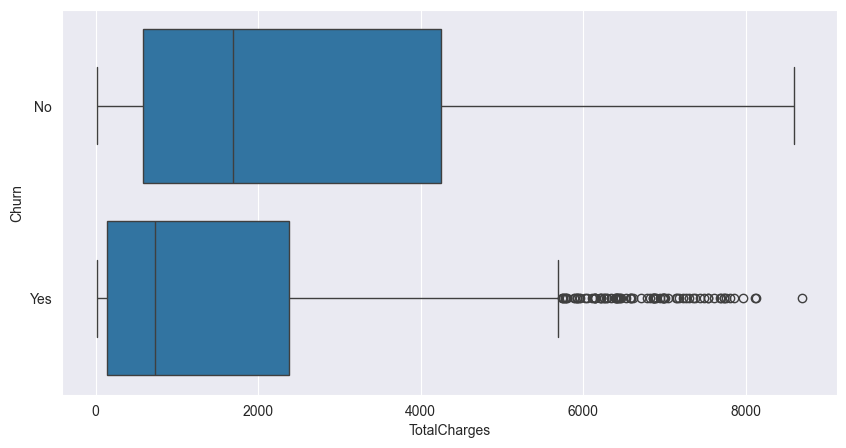

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=pd.concat([X_train, y_train], axis=1), x='TotalCharges', y='Churn')
plt.show()

As it may be seen, there are many outliers for `Yes` target class. Therefore, I will use Median Imputation in order to not impact the variance of the dataset using
mean so much due to skewed distribution and outliers. Also, in order to avoid data leakage, I will perform imputation separately on training and test set using median
of the training set `TotalCharges` column.

In [23]:
training_median_total_charges = X_train['TotalCharges'].median()
training_median_total_charges

np.float64(1410.8)

In [24]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [25]:
X_train['TotalCharges'] = X_train['TotalCharges'].fillna(training_median_total_charges)
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,Female,0,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80
1623,Female,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
6074,Male,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
1362,Male,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95
6754,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,1410.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00
5191,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30
5226,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05
5390,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15


In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 2142 to 860
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   SeniorCitizen     5634 non-null   int64  
 2   Partner           5634 non-null   object 
 3   Dependents        5634 non-null   object 
 4   tenure            5634 non-null   int64  
 5   PhoneService      5634 non-null   object 
 6   MultipleLines     5634 non-null   object 
 7   InternetService   5634 non-null   object 
 8   OnlineSecurity    5634 non-null   object 
 9   OnlineBackup      5634 non-null   object 
 10  DeviceProtection  5634 non-null   object 
 11  TechSupport       5634 non-null   object 
 12  StreamingTV       5634 non-null   object 
 13  StreamingMovies   5634 non-null   object 
 14  Contract          5634 non-null   object 
 15  PaperlessBilling  5634 non-null   object 
 16  PaymentMethod     5634 non-null   object 
 17

In [27]:
X_test['TotalCharges'] = X_test['TotalCharges'].fillna(training_median_total_charges)
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
185,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.80
2715,Male,0,No,No,41,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45
3825,Female,0,Yes,Yes,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.70
1807,Female,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35
132,Male,0,No,No,67,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366,Female,0,Yes,No,64,Yes,No,DSL,No,Yes,Yes,Yes,No,Yes,Two year,Yes,Mailed check,68.30,4378.80
315,Male,0,Yes,Yes,51,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,One year,No,Credit card (automatic),110.05,5686.40
2439,Male,0,Yes,Yes,17,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.90,329.75
5002,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.10


Now that I handled missing values, I can perform data transformation of categorical features into numerical ones, in order to be able to train a model on them.

In [28]:
# Extract rows with any null values
rows_with_nulls = X_features[X_features.isnull().any(axis=1)]

print(rows_with_nulls)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 N

First, I should analyze categorical columns impact on the Churn target variable in order to select a proper method of encoding classes, so that it will improve model's
performance.

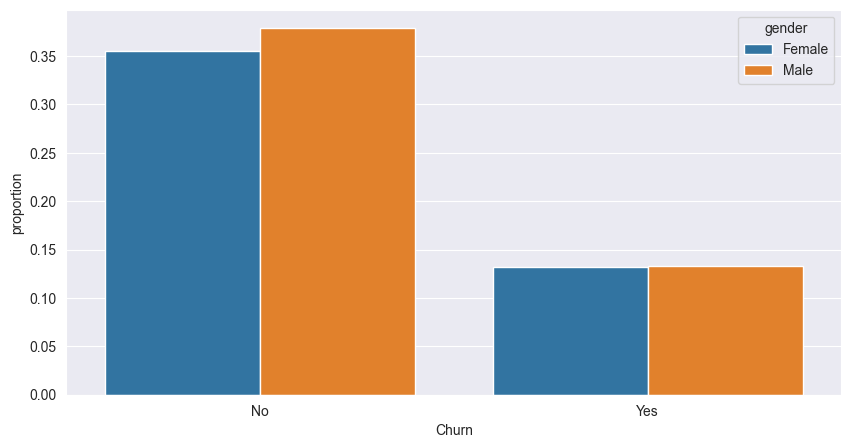

In [29]:
plt.figure(figsize=(10, 5))
sns.countplot(data=pd.concat([X_train, y_train], axis=1), x='Churn', hue='gender', stat="proportion")
plt.show()

As it may be seen, there is no significant difference in whether females or males are more prone to Churn. Therefore, I can just use One-Hot Encoding for this column.

In [31]:
oneHotEncoder = OneHotEncoder(drop='first', sparse_output=False, dtype=int)
X_train['gender'] = oneHotEncoder.fit_transform(X=X_train['gender'].to_numpy().reshape(-1, 1))
X_test['gender'] = oneHotEncoder.transform(X=X_test['gender'].to_numpy().reshape(-1, 1))

In [32]:
X_train.head(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,0,0,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80
1623,0,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
6074,1,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
1362,1,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95
6754,1,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,1410.80
1212,1,0,No,No,7,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.55,521.35
2722,1,0,Yes,Yes,32,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,18.95,613.95
4006,1,0,Yes,Yes,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.80,1414.65
6791,1,0,No,No,19,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.65,733.35
5466,1,0,No,Yes,10,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),19.95,219.50


In [33]:
X_test.head(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
185,0,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.80
2715,1,0,No,No,41,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45
3825,0,0,Yes,Yes,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.70
1807,0,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35
132,1,0,No,No,67,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.10
1263,0,1,Yes,No,68,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),89.60,6127.60
3732,0,0,Yes,Yes,23,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),77.15,1759.40
1672,1,0,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic),72.10,5016.65
811,1,0,No,No,70,Yes,Yes,Fiber optic,Yes,No,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),104.00,7250.15
2526,1,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.40,19.40


Next, I will analyze if a customer having a partner is more likely to Churn or not.

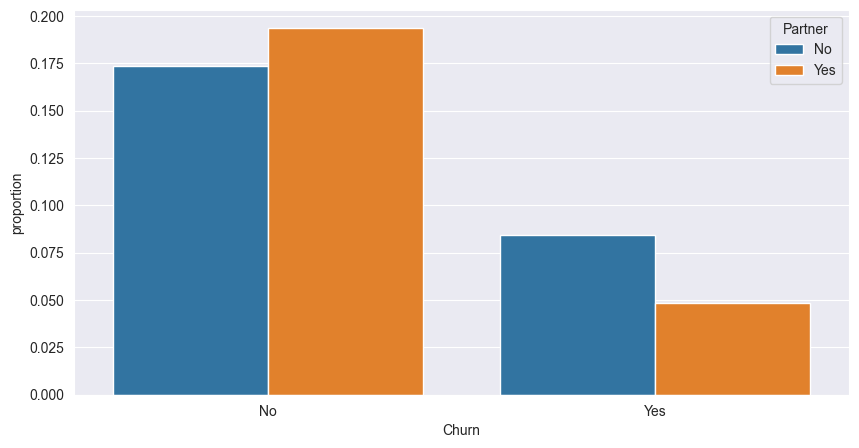

In [35]:
plt.figure(figsize=(10, 5))
sns.countplot(data=pd.concat([X_train, y_train]), x='Churn', hue='Partner', stat='proportion')
plt.show()

Here, customers that don't have a partner are more likely to Churn, therefore, having a partner is directly proportionate with target variable, and I will map `Yes`
to 1.

In [36]:
# encode_map_partner = {0: 'No', 1: 'Yes'}
# X_train['Partner']= X_train['Partner'].map(encode_map_partner)
# X_test['Partner'] = X_test['Partner'].map(encode_map_partner)

In [37]:
X_train.head(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,0,0,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80
1623,0,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
6074,1,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
1362,1,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95
6754,1,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,1410.80
1212,1,0,No,No,7,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.55,521.35
2722,1,0,Yes,Yes,32,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,18.95,613.95
4006,1,0,Yes,Yes,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.80,1414.65
6791,1,0,No,No,19,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.65,733.35
5466,1,0,No,Yes,10,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),19.95,219.50


In [38]:
X_train.tail(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5334,0,0,Yes,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),107.95,5293.20
466,1,1,Yes,No,64,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,No,Electronic check,102.10,6538.45
6265,0,0,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.25,74.20
5734,1,0,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,89.40,6376.55
3092,0,0,No,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,25.10,25.10
3772,1,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00
5191,0,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30
5226,1,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05
5390,1,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15
860,1,0,No,No,26,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.30


In [39]:
ordinalEncoder = OrdinalEncoder(dtype=int)
X_train['Partner'] = ordinalEncoder.fit_transform(X=X_train['Partner'].to_numpy().reshape(-1, 1), y=y_train)
X_test['Partner'] = ordinalEncoder.transform(X=X_test['Partner'].to_numpy().reshape(-1, 1))

In [40]:
X_train.head(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,0,0,0,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80
1623,0,0,0,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
6074,1,0,1,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
1362,1,0,0,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95
6754,1,0,0,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,1410.80
1212,1,0,0,No,7,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.55,521.35
2722,1,0,1,Yes,32,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,18.95,613.95
4006,1,0,1,Yes,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.80,1414.65
6791,1,0,0,No,19,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.65,733.35
5466,1,0,0,Yes,10,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),19.95,219.50


In [41]:
X_train.tail(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5334,0,0,1,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),107.95,5293.20
466,1,1,1,No,64,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,No,Electronic check,102.10,6538.45
6265,0,0,0,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.25,74.20
5734,1,0,1,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,89.40,6376.55
3092,0,0,0,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,25.10,25.10
3772,1,0,1,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00
5191,0,0,1,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30
5226,1,0,1,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05
5390,1,1,0,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15
860,1,0,0,No,26,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.30


Next, I will evaluate if Dependents are contributing to the Churn category.

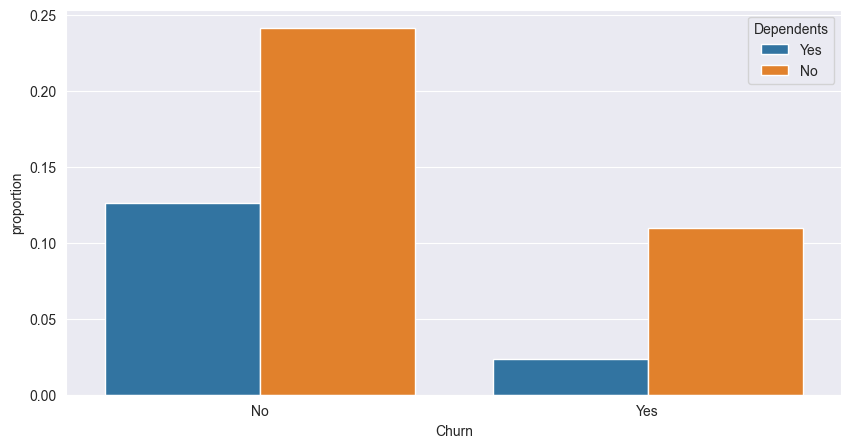

In [42]:
plt.figure(figsize=(10, 5))
sns.countplot(data=pd.concat([X_train, y_train]), x='Churn', hue='Dependents', stat='proportion')
plt.show()

As it may be noticed, people with no dependents are more likely to Churn, judging by the proportion of the people with dependents and without them that are inclined
to Churn and those who do not.
$$
\text{ Churn=0 $\frac{Dependents=0}{Dependents=1}$} = \frac{0.24}{0.13} \approx 1.85 \text{ vs }\frac{0.11}{0.02} = 5.5 = \text{ Churn=1
$\frac{Dependents=0}{Dependents=1}$}
$$
Therefore, I will encode `Dependents = Yes` with 0.

In [43]:
X_train.head(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,0,0,0,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80
1623,0,0,0,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
6074,1,0,1,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
1362,1,0,0,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95
6754,1,0,0,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,1410.80
1212,1,0,0,No,7,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.55,521.35
2722,1,0,1,Yes,32,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,18.95,613.95
4006,1,0,1,Yes,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.80,1414.65
6791,1,0,0,No,19,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.65,733.35
5466,1,0,0,Yes,10,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),19.95,219.50


In [44]:
X_train.tail(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5334,0,0,1,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),107.95,5293.20
466,1,1,1,No,64,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,No,Electronic check,102.10,6538.45
6265,0,0,0,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.25,74.20
5734,1,0,1,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,89.40,6376.55
3092,0,0,0,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,25.10,25.10
3772,1,0,1,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00
5191,0,0,1,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30
5226,1,0,1,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05
5390,1,1,0,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15
860,1,0,0,No,26,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.30


In [45]:
# ordinalEncoder = OrdinalEncoder(dtype=int)
# X_train['Dependents'] = ordinalEncoder.fit_transform(X=X_train['Dependents'].to_numpy().reshape(-1, 1), y=y_train)
# X_test['Dependents'] = ordinalEncoder.transform(X=X_test['Dependents'].to_numpy().reshape(-1, 1))

encode_map_dependents = {'Yes': 0, 'No': 1}
X_train['Dependents'] = X_train['Dependents'].map(encode_map_dependents)
X_test['Dependents'] = X_test['Dependents'].map(encode_map_dependents)

In [46]:
X_train.head(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,0,0,0,0,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80
1623,0,0,0,1,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
6074,1,0,1,1,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
1362,1,0,0,1,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95
6754,1,0,0,0,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,1410.80
1212,1,0,0,1,7,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.55,521.35
2722,1,0,1,0,32,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,18.95,613.95
4006,1,0,1,0,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.80,1414.65
6791,1,0,0,1,19,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.65,733.35
5466,1,0,0,0,10,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),19.95,219.50


In [47]:
X_train.tail(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5334,0,0,1,0,49,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),107.95,5293.20
466,1,1,1,1,64,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,No,Electronic check,102.10,6538.45
6265,0,0,0,1,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.25,74.20
5734,1,0,1,0,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,89.40,6376.55
3092,0,0,0,1,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,25.10,25.10
3772,1,0,1,1,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00
5191,0,0,1,0,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30
5226,1,0,1,0,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05
5390,1,1,0,1,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15
860,1,0,0,1,26,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.30


Similarly, I will analyze next Categorical Features.

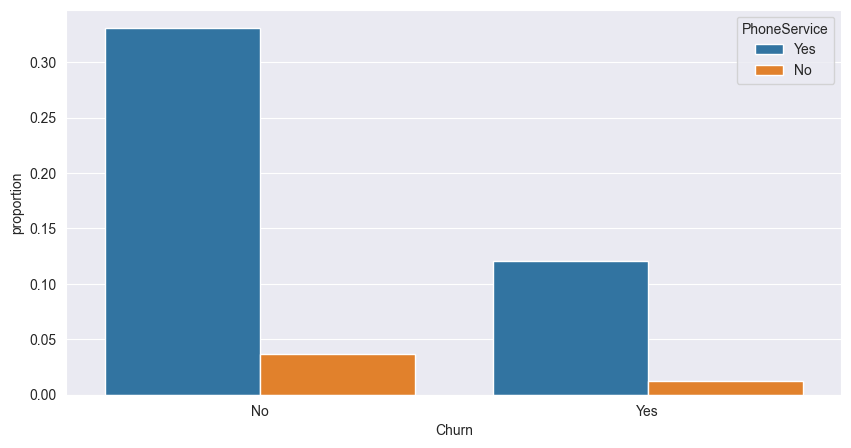

In [48]:
plt.figure(figsize=(10, 5))
sns.countplot(data=pd.concat([X_train, y_train]), x='Churn', hue='PhoneService', stat='proportion')
plt.show()

There is no significance difference in whether Customer with Phone Service or without will churn or not. Therefore, I will use OneHotEncoder.

In [49]:
X_train.head(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,0,0,0,0,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80
1623,0,0,0,1,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
6074,1,0,1,1,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
1362,1,0,0,1,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95
6754,1,0,0,0,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,1410.80
1212,1,0,0,1,7,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.55,521.35
2722,1,0,1,0,32,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,18.95,613.95
4006,1,0,1,0,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.80,1414.65
6791,1,0,0,1,19,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.65,733.35
5466,1,0,0,0,10,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),19.95,219.50


In [50]:
X_train.tail(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5334,0,0,1,0,49,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),107.95,5293.20
466,1,1,1,1,64,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,No,Electronic check,102.10,6538.45
6265,0,0,0,1,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.25,74.20
5734,1,0,1,0,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,89.40,6376.55
3092,0,0,0,1,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,25.10,25.10
3772,1,0,1,1,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00
5191,0,0,1,0,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30
5226,1,0,1,0,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05
5390,1,1,0,1,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15
860,1,0,0,1,26,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.30


In [51]:
oneHotEncoder = OneHotEncoder(drop='first', sparse_output=False, dtype=int)
X_train['PhoneService'] = oneHotEncoder.fit_transform(X=X_train['PhoneService'].to_numpy().reshape(-1, 1))
X_test['PhoneService'] = oneHotEncoder.transform(X=X_test['PhoneService'].to_numpy().reshape(-1, 1))

In [52]:
X_train.head(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,0,0,0,0,21,1,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80
1623,0,0,0,1,54,1,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
6074,1,0,1,1,1,0,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
1362,1,0,0,1,4,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95
6754,1,0,0,0,0,1,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,1410.80
1212,1,0,0,1,7,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.55,521.35
2722,1,0,1,0,32,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,18.95,613.95
4006,1,0,1,0,72,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.80,1414.65
6791,1,0,0,1,19,0,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.65,733.35
5466,1,0,0,0,10,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),19.95,219.50


In [53]:
X_train.tail(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5334,0,0,1,0,49,1,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),107.95,5293.20
466,1,1,1,1,64,1,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,No,Electronic check,102.10,6538.45
6265,0,0,0,1,2,1,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.25,74.20
5734,1,0,1,0,72,1,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,89.40,6376.55
3092,0,0,0,1,1,0,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,25.10,25.10
3772,1,0,1,1,1,1,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00
5191,0,0,1,0,23,1,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30
5226,1,0,1,0,12,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05
5390,1,1,0,1,12,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15
860,1,0,0,1,26,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.30


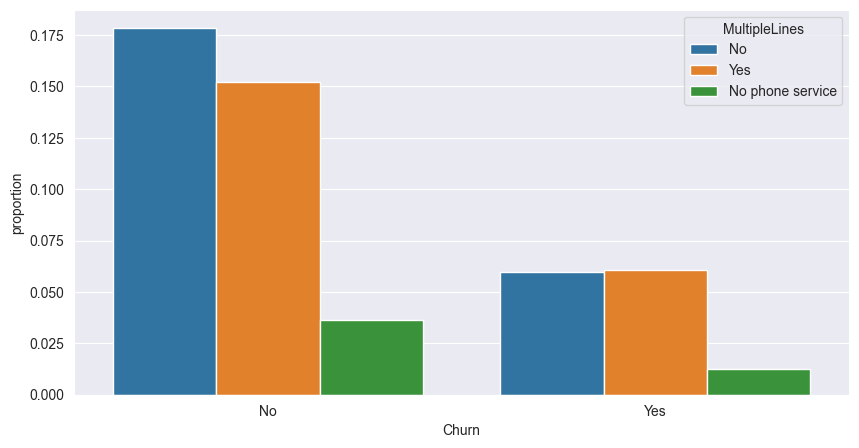

In [55]:
plt.figure(figsize=(10, 5))
sns.countplot(data=pd.concat([X_train, y_train]), x='Churn', hue='MultipleLines', stat='proportion')
plt.show()

Similarly, no significant impact on the churn category based on whether customers have Multiple Lines or not.

In [56]:
X_train.head(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,0,0,0,0,21,1,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80
1623,0,0,0,1,54,1,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
6074,1,0,1,1,1,0,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
1362,1,0,0,1,4,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95
6754,1,0,0,0,0,1,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,1410.80
1212,1,0,0,1,7,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.55,521.35
2722,1,0,1,0,32,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,18.95,613.95
4006,1,0,1,0,72,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.80,1414.65
6791,1,0,0,1,19,0,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.65,733.35
5466,1,0,0,0,10,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),19.95,219.50


In [57]:
X_train.tail(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5334,0,0,1,0,49,1,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),107.95,5293.20
466,1,1,1,1,64,1,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,No,Electronic check,102.10,6538.45
6265,0,0,0,1,2,1,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.25,74.20
5734,1,0,1,0,72,1,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,89.40,6376.55
3092,0,0,0,1,1,0,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,25.10,25.10
3772,1,0,1,1,1,1,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00
5191,0,0,1,0,23,1,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30
5226,1,0,1,0,12,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05
5390,1,1,0,1,12,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15
860,1,0,0,1,26,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.30


In [58]:
oneHotEncoder = OneHotEncoder(drop='first', sparse_output=False, dtype=int)
encoded_train_multiple_lines = oneHotEncoder.fit_transform(X=X_train['MultipleLines'].to_numpy().reshape(-1, 1), y=y_train)
encoded_train_multiple_lines_df = pd.DataFrame(encoded_train_multiple_lines, columns=oneHotEncoder.get_feature_names_out(['MultipleLines']), index=X_train.index)
X_train = pd.concat([X_train, encoded_train_multiple_lines_df], axis=1).drop(['MultipleLines'], axis=1)

encoded_test_multiple_lines = oneHotEncoder.transform(X=X_test['MultipleLines'].to_numpy().reshape(-1, 1))
encoded_test_multiple_lines_df = pd.DataFrame(encoded_test_multiple_lines, columns=oneHotEncoder.get_feature_names_out(['MultipleLines']), index=X_test.index)
X_test = pd.concat([X_test, encoded_test_multiple_lines_df], axis=1).drop(['MultipleLines'], axis=1)

In [59]:
X_train.head(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes
2142,0,0,0,0,21,1,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80,0,0
1623,0,0,0,1,54,1,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,0,1
6074,1,0,1,1,1,0,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,1,0
1362,1,0,0,1,4,1,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,0,0
6754,1,0,0,0,0,1,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,1410.80,0,1
1212,1,0,0,1,7,1,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.55,521.35,0,0
2722,1,0,1,0,32,1,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,18.95,613.95,0,0
4006,1,0,1,0,72,1,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.80,1414.65,0,0
6791,1,0,0,1,19,0,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.65,733.35,1,0
5466,1,0,0,0,10,1,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),19.95,219.50,0,0


In [60]:
X_train.tail(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes
5334,0,0,1,0,49,1,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),107.95,5293.20,0,1
466,1,1,1,1,64,1,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,No,Electronic check,102.10,6538.45,0,1
6265,0,0,0,1,2,1,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.25,74.20,0,0
5734,1,0,1,0,72,1,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,89.40,6376.55,0,1
3092,0,0,0,1,1,0,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,25.10,25.10,1,0
3772,1,0,1,1,1,1,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,0,0
5191,0,0,1,0,23,1,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,0,1
5226,1,0,1,0,12,1,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,0,0
5390,1,1,0,1,12,1,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,0,1
860,1,0,0,1,26,1,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.30,0,0


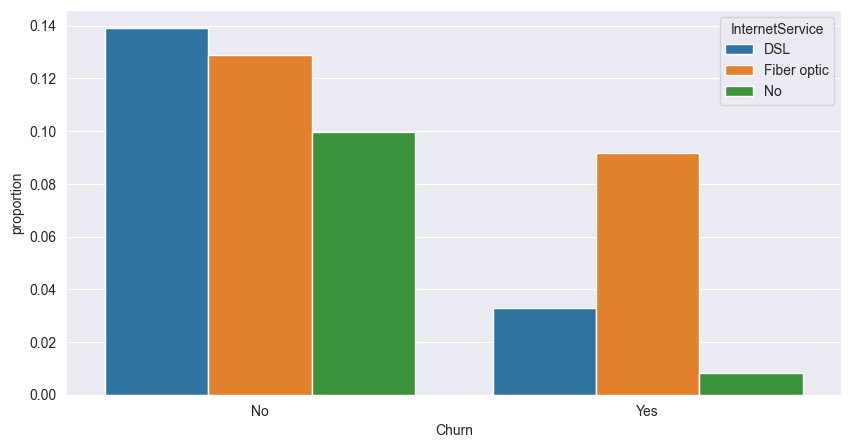

In [61]:
plt.figure(figsize=(10, 5))
sns.countplot(data=pd.concat([X_train, y_train]), x='Churn', hue='InternetService', stat='proportion')
plt.show()

As it may be seen, customers with Fiber Optic are more inclined to churn their provider. Therefore, there is a order, and I will use Ordinal Encoder.

In [62]:
X_train.head(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes
2142,0,0,0,0,21,1,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80,0,0
1623,0,0,0,1,54,1,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,0,1
6074,1,0,1,1,1,0,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,1,0
1362,1,0,0,1,4,1,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,0,0
6754,1,0,0,0,0,1,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,1410.80,0,1
1212,1,0,0,1,7,1,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.55,521.35,0,0
2722,1,0,1,0,32,1,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,18.95,613.95,0,0
4006,1,0,1,0,72,1,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.80,1414.65,0,0
6791,1,0,0,1,19,0,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.65,733.35,1,0
5466,1,0,0,0,10,1,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),19.95,219.50,0,0


In [63]:
X_train.tail(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes
5334,0,0,1,0,49,1,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),107.95,5293.20,0,1
466,1,1,1,1,64,1,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,No,Electronic check,102.10,6538.45,0,1
6265,0,0,0,1,2,1,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.25,74.20,0,0
5734,1,0,1,0,72,1,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,89.40,6376.55,0,1
3092,0,0,0,1,1,0,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,25.10,25.10,1,0
3772,1,0,1,1,1,1,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,0,0
5191,0,0,1,0,23,1,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,0,1
5226,1,0,1,0,12,1,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,0,0
5390,1,1,0,1,12,1,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,0,1
860,1,0,0,1,26,1,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.30,0,0


In [64]:
ordinalEncoder = OrdinalEncoder(dtype=int, categories=[['No', 'DSL', 'Fiber optic']])
X_train['InternetService'] = ordinalEncoder.fit_transform(X=X_train['InternetService'].to_numpy().reshape(-1, 1), y=y_train)
# encoded_train_internet_service_df = pd.DataFrame(encoded_train_internet_service,
#                                                  columns=ordinalEncoder.get_feature_names_out(['InternetService']),
#                                                  index=X_train.index)
# X_train = pd.concat([X_train, encoded_train_internet_service_df], axis=1).drop(['InternetService'], axis=1)

X_test['InternetService'] = ordinalEncoder.transform(X=X_test['InternetService'].to_numpy().reshape(-1, 1))
# encoded_test_internet_service_df = pd.DataFrame(encoded_test_internet_service,
#                                                 columns=ordinalEncoder.get_feature_names_out(['InternetService']),
#                                                 index=X_test.index)
# X_test = pd.concat([X_test, encoded_test_internet_service_df], axis=1).drop(['InternetService'], axis=1)

In [65]:
X_train.head(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes
2142,0,0,0,0,21,1,1,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80,0,0
1623,0,0,0,1,54,1,2,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,0,1
6074,1,0,1,1,1,0,1,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,1,0
1362,1,0,0,1,4,1,2,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,0,0
6754,1,0,0,0,0,1,1,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,1410.80,0,1
1212,1,0,0,1,7,1,2,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.55,521.35,0,0
2722,1,0,1,0,32,1,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,18.95,613.95,0,0
4006,1,0,1,0,72,1,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.80,1414.65,0,0
6791,1,0,0,1,19,0,1,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.65,733.35,1,0
5466,1,0,0,0,10,1,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),19.95,219.50,0,0


In [67]:
X_train.tail(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes
5334,0,0,1,0,49,1,2,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),107.95,5293.20,0,1
466,1,1,1,1,64,1,2,No,No,Yes,Yes,Yes,Yes,Two year,No,Electronic check,102.10,6538.45,0,1
6265,0,0,0,1,2,1,1,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.25,74.20,0,0
5734,1,0,1,0,72,1,1,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,89.40,6376.55,0,1
3092,0,0,0,1,1,0,1,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,25.10,25.10,1,0
3772,1,0,1,1,1,1,2,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,0,0
5191,0,0,1,0,23,1,1,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,0,1
5226,1,0,1,0,12,1,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,0,0
5390,1,1,0,1,12,1,2,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,0,1
860,1,0,0,1,26,1,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.30,0,0


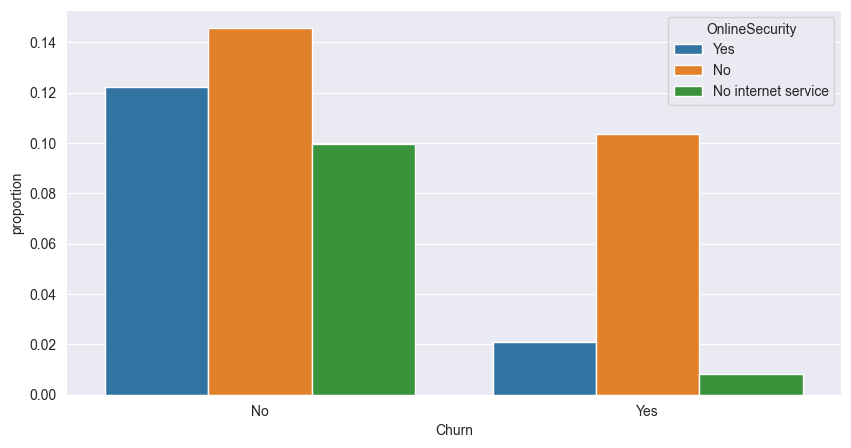

In [68]:
plt.figure(figsize=(10, 5))
sns.countplot(data=pd.concat([X_train, y_train]), x='Churn', hue='OnlineSecurity', stat='proportion')
plt.show()

Similarly, customers that have no online security are more prone to churn.

In [69]:
X_train.head(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes
2142,0,0,0,0,21,1,1,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80,0,0
1623,0,0,0,1,54,1,2,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,0,1
6074,1,0,1,1,1,0,1,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,1,0
1362,1,0,0,1,4,1,2,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,0,0
6754,1,0,0,0,0,1,1,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,1410.80,0,1
1212,1,0,0,1,7,1,2,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.55,521.35,0,0
2722,1,0,1,0,32,1,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,18.95,613.95,0,0
4006,1,0,1,0,72,1,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.80,1414.65,0,0
6791,1,0,0,1,19,0,1,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.65,733.35,1,0
5466,1,0,0,0,10,1,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),19.95,219.50,0,0


In [70]:
X_train.tail(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes
5334,0,0,1,0,49,1,2,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),107.95,5293.20,0,1
466,1,1,1,1,64,1,2,No,No,Yes,Yes,Yes,Yes,Two year,No,Electronic check,102.10,6538.45,0,1
6265,0,0,0,1,2,1,1,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.25,74.20,0,0
5734,1,0,1,0,72,1,1,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,89.40,6376.55,0,1
3092,0,0,0,1,1,0,1,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,25.10,25.10,1,0
3772,1,0,1,1,1,1,2,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,0,0
5191,0,0,1,0,23,1,1,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,0,1
5226,1,0,1,0,12,1,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,0,0
5390,1,1,0,1,12,1,2,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,0,1
860,1,0,0,1,26,1,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.30,0,0


In [71]:
ordinalEncoder = OrdinalEncoder(dtype=int, categories=[['Yes', 'No internet service', 'No']])
X_train['OnlineSecurity'] = ordinalEncoder.fit_transform(X=X_train['OnlineSecurity'].to_numpy().reshape(-1, 1), y=y_train)
X_test['OnlineSecurity'] = ordinalEncoder.transform(X=X_test['OnlineSecurity'].to_numpy().reshape(-1, 1))

# TODO: Verify Performance using TargetEncoder here.
# targetEncoder = TargetEncoder(target_type='binary')
# X_train['OnlineSecurity'] = targetEncoder.fit_transform(X=X_train['OnlineSecurity'].to_numpy().reshape(-1, 1), y=y_train)
# X_test['OnlineSecurity'] = targetEncoder.transform(X=X_test['OnlineSecurity'].to_numpy().reshape(-1, 1))

In [72]:
X_train.head(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes
2142,0,0,0,0,21,1,1,0,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80,0,0
1623,0,0,0,1,54,1,2,2,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,0,1
6074,1,0,1,1,1,0,1,2,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,1,0
1362,1,0,0,1,4,1,2,2,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,0,0
6754,1,0,0,0,0,1,1,0,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,1410.80,0,1
1212,1,0,0,1,7,1,2,2,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.55,521.35,0,0
2722,1,0,1,0,32,1,0,1,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,18.95,613.95,0,0
4006,1,0,1,0,72,1,0,1,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.80,1414.65,0,0
6791,1,0,0,1,19,0,1,2,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.65,733.35,1,0
5466,1,0,0,0,10,1,0,1,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),19.95,219.50,0,0


In [73]:
X_train.tail(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes
5334,0,0,1,0,49,1,2,2,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),107.95,5293.20,0,1
466,1,1,1,1,64,1,2,2,No,Yes,Yes,Yes,Yes,Two year,No,Electronic check,102.10,6538.45,0,1
6265,0,0,0,1,2,1,1,2,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.25,74.20,0,0
5734,1,0,1,0,72,1,1,0,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,89.40,6376.55,0,1
3092,0,0,0,1,1,0,1,2,No,No,No,No,No,Month-to-month,Yes,Mailed check,25.10,25.10,1,0
3772,1,0,1,1,1,1,2,0,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,0,0
5191,0,0,1,0,23,1,1,0,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,0,1
5226,1,0,1,0,12,1,0,1,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,0,0
5390,1,1,0,1,12,1,2,2,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,0,1
860,1,0,0,1,26,1,0,1,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.30,0,0


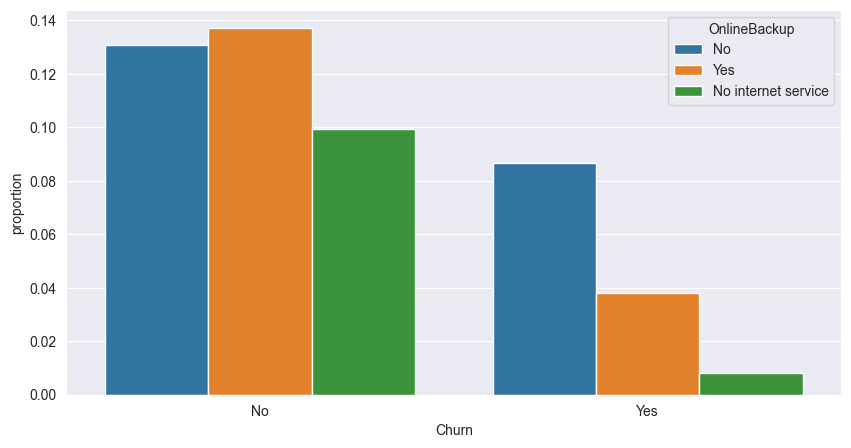

In [74]:
plt.figure(figsize=(10, 5))
sns.countplot(data=pd.concat([X_train, y_train]), x='Churn', hue='OnlineBackup', stat='proportion')
plt.show()

Same results, people with no Online Backups are more inclined to churn

In [75]:
X_train.head(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes
2142,0,0,0,0,21,1,1,0,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80,0,0
1623,0,0,0,1,54,1,2,2,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,0,1
6074,1,0,1,1,1,0,1,2,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,1,0
1362,1,0,0,1,4,1,2,2,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,0,0
6754,1,0,0,0,0,1,1,0,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,1410.80,0,1
1212,1,0,0,1,7,1,2,2,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.55,521.35,0,0
2722,1,0,1,0,32,1,0,1,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,18.95,613.95,0,0
4006,1,0,1,0,72,1,0,1,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.80,1414.65,0,0
6791,1,0,0,1,19,0,1,2,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.65,733.35,1,0
5466,1,0,0,0,10,1,0,1,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),19.95,219.50,0,0


In [76]:
X_train.tail(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes
5334,0,0,1,0,49,1,2,2,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),107.95,5293.20,0,1
466,1,1,1,1,64,1,2,2,No,Yes,Yes,Yes,Yes,Two year,No,Electronic check,102.10,6538.45,0,1
6265,0,0,0,1,2,1,1,2,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.25,74.20,0,0
5734,1,0,1,0,72,1,1,0,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,89.40,6376.55,0,1
3092,0,0,0,1,1,0,1,2,No,No,No,No,No,Month-to-month,Yes,Mailed check,25.10,25.10,1,0
3772,1,0,1,1,1,1,2,0,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,0,0
5191,0,0,1,0,23,1,1,0,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,0,1
5226,1,0,1,0,12,1,0,1,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,0,0
5390,1,1,0,1,12,1,2,2,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,0,1
860,1,0,0,1,26,1,0,1,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.30,0,0


In [77]:
ordinalEncoder = OrdinalEncoder(dtype=int, categories=[['Yes', 'No internet service', 'No']])
X_train['OnlineBackup'] = ordinalEncoder.fit_transform(X=X_train['OnlineBackup'].to_numpy().reshape(-1, 1), y=y_train)
X_test['OnlineBackup'] = ordinalEncoder.transform(X=X_test['OnlineBackup'].to_numpy().reshape(-1, 1))

In [78]:
X_train.head(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes
2142,0,0,0,0,21,1,1,0,2,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80,0,0
1623,0,0,0,1,54,1,2,2,0,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,0,1
6074,1,0,1,1,1,0,1,2,2,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,1,0
1362,1,0,0,1,4,1,2,2,2,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,0,0
6754,1,0,0,0,0,1,1,0,0,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,1410.80,0,1
1212,1,0,0,1,7,1,2,2,2,No,No,No,No,Month-to-month,Yes,Electronic check,69.55,521.35,0,0
2722,1,0,1,0,32,1,0,1,1,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,18.95,613.95,0,0
4006,1,0,1,0,72,1,0,1,1,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.80,1414.65,0,0
6791,1,0,0,1,19,0,1,2,2,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.65,733.35,1,0
5466,1,0,0,0,10,1,0,1,1,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),19.95,219.50,0,0


In [79]:
X_train.tail(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes
5334,0,0,1,0,49,1,2,2,0,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),107.95,5293.20,0,1
466,1,1,1,1,64,1,2,2,2,Yes,Yes,Yes,Yes,Two year,No,Electronic check,102.10,6538.45,0,1
6265,0,0,0,1,2,1,1,2,2,No,No,No,No,Month-to-month,Yes,Mailed check,45.25,74.20,0,0
5734,1,0,1,0,72,1,1,0,0,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,89.40,6376.55,0,1
3092,0,0,0,1,1,0,1,2,2,No,No,No,No,Month-to-month,Yes,Mailed check,25.10,25.10,1,0
3772,1,0,1,1,1,1,2,0,2,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,0,0
5191,0,0,1,0,23,1,1,0,0,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,0,1
5226,1,0,1,0,12,1,0,1,1,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,0,0
5390,1,1,0,1,12,1,2,2,2,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,0,1
860,1,0,0,1,26,1,0,1,1,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.30,0,0


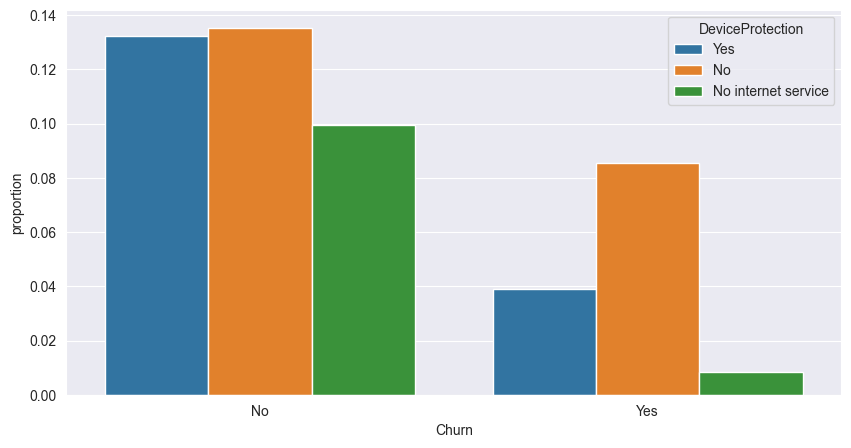

In [80]:
plt.figure(figsize=(10, 5))
sns.countplot(data=pd.concat([X_train, y_train]), x='Churn', hue='DeviceProtection', stat='proportion')
plt.show()

In [81]:
X_train.head(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes
2142,0,0,0,0,21,1,1,0,2,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80,0,0
1623,0,0,0,1,54,1,2,2,0,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,0,1
6074,1,0,1,1,1,0,1,2,2,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,1,0
1362,1,0,0,1,4,1,2,2,2,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,0,0
6754,1,0,0,0,0,1,1,0,0,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,1410.80,0,1
1212,1,0,0,1,7,1,2,2,2,No,No,No,No,Month-to-month,Yes,Electronic check,69.55,521.35,0,0
2722,1,0,1,0,32,1,0,1,1,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,18.95,613.95,0,0
4006,1,0,1,0,72,1,0,1,1,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.80,1414.65,0,0
6791,1,0,0,1,19,0,1,2,2,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.65,733.35,1,0
5466,1,0,0,0,10,1,0,1,1,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),19.95,219.50,0,0


In [82]:
X_train.tail(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes
5334,0,0,1,0,49,1,2,2,0,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),107.95,5293.20,0,1
466,1,1,1,1,64,1,2,2,2,Yes,Yes,Yes,Yes,Two year,No,Electronic check,102.10,6538.45,0,1
6265,0,0,0,1,2,1,1,2,2,No,No,No,No,Month-to-month,Yes,Mailed check,45.25,74.20,0,0
5734,1,0,1,0,72,1,1,0,0,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,89.40,6376.55,0,1
3092,0,0,0,1,1,0,1,2,2,No,No,No,No,Month-to-month,Yes,Mailed check,25.10,25.10,1,0
3772,1,0,1,1,1,1,2,0,2,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,0,0
5191,0,0,1,0,23,1,1,0,0,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,0,1
5226,1,0,1,0,12,1,0,1,1,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,0,0
5390,1,1,0,1,12,1,2,2,2,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,0,1
860,1,0,0,1,26,1,0,1,1,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.30,0,0


In [83]:
oneHotEncoder = OneHotEncoder(drop='first', sparse_output=False, dtype=int)
encoded_train_protected_device = oneHotEncoder.fit_transform(X=X_train['DeviceProtection'].to_numpy().reshape(-1, 1), y=y_train)
encoded_train_protected_device_df = pd.DataFrame(encoded_train_protected_device, columns=oneHotEncoder.get_feature_names_out(['DeviceProtection']), index=X_train.index)
X_train = pd.concat([X_train, encoded_train_protected_device_df], axis=1).drop(['DeviceProtection'], axis=1)

encoded_test_protected_device = oneHotEncoder.transform(X=X_test['DeviceProtection'].to_numpy().reshape(-1, 1))
encoded_test_protected_device_df = pd.DataFrame(encoded_test_protected_device, columns=oneHotEncoder.get_feature_names_out(['DeviceProtection']), index=X_test.index)
X_test = pd.concat([X_test, encoded_test_protected_device_df], axis=1).drop(['DeviceProtection'], axis=1)

In [84]:
X_train.head(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,TechSupport,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,DeviceProtection_No internet service,DeviceProtection_Yes
2142,0,0,0,0,21,1,1,0,2,No,...,Yes,One year,No,Mailed check,64.85,1336.80,0,0,0,1
1623,0,0,0,1,54,1,2,2,0,No,...,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,0,1,0,0
6074,1,0,1,1,1,0,1,2,2,No,...,No,Month-to-month,Yes,Electronic check,23.45,23.45,1,0,0,0
1362,1,0,0,1,4,1,2,2,2,No,...,No,Month-to-month,Yes,Electronic check,70.20,237.95,0,0,0,0
6754,1,0,0,0,0,1,1,0,0,Yes,...,No,Two year,Yes,Bank transfer (automatic),61.90,1410.80,0,1,0,0
1212,1,0,0,1,7,1,2,2,2,No,...,No,Month-to-month,Yes,Electronic check,69.55,521.35,0,0,0,0
2722,1,0,1,0,32,1,0,1,1,No internet service,...,No internet service,Two year,No,Mailed check,18.95,613.95,0,0,1,0
4006,1,0,1,0,72,1,0,1,1,No internet service,...,No internet service,Two year,Yes,Credit card (automatic),19.80,1414.65,0,0,1,0
6791,1,0,0,1,19,0,1,2,2,No,...,No,Month-to-month,Yes,Electronic check,39.65,733.35,1,0,0,1
5466,1,0,0,0,10,1,0,1,1,No internet service,...,No internet service,One year,Yes,Bank transfer (automatic),19.95,219.50,0,0,1,0


In [85]:
X_train.tail(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,TechSupport,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,DeviceProtection_No internet service,DeviceProtection_Yes
5334,0,0,1,0,49,1,2,2,0,Yes,...,Yes,Two year,Yes,Bank transfer (automatic),107.95,5293.20,0,1,0,1
466,1,1,1,1,64,1,2,2,2,Yes,...,Yes,Two year,No,Electronic check,102.10,6538.45,0,1,0,1
6265,0,0,0,1,2,1,1,2,2,No,...,No,Month-to-month,Yes,Mailed check,45.25,74.20,0,0,0,0
5734,1,0,1,0,72,1,1,0,0,Yes,...,Yes,Two year,Yes,Mailed check,89.40,6376.55,0,1,0,1
3092,0,0,0,1,1,0,1,2,2,No,...,No,Month-to-month,Yes,Mailed check,25.10,25.10,1,0,0,0
3772,1,0,1,1,1,1,2,0,2,No,...,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,0,0,0,0
5191,0,0,1,0,23,1,1,0,0,Yes,...,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,0,1,0,1
5226,1,0,1,0,12,1,0,1,1,No internet service,...,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,0,0,1,0
5390,1,1,0,1,12,1,2,2,2,No,...,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,0,1,0,1
860,1,0,0,1,26,1,0,1,1,No internet service,...,No internet service,One year,No,Credit card (automatic),19.80,457.30,0,0,1,0


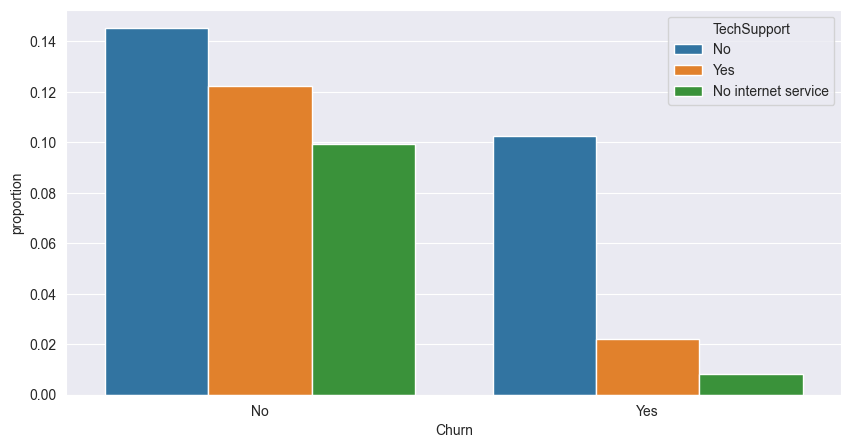

In [86]:
plt.figure(figsize=(10, 5))
sns.countplot(data=pd.concat([X_train, y_train]), x='Churn', hue='TechSupport', stat='proportion')
plt.show()

In [87]:
X_train.head(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,TechSupport,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,DeviceProtection_No internet service,DeviceProtection_Yes
2142,0,0,0,0,21,1,1,0,2,No,...,Yes,One year,No,Mailed check,64.85,1336.80,0,0,0,1
1623,0,0,0,1,54,1,2,2,0,No,...,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,0,1,0,0
6074,1,0,1,1,1,0,1,2,2,No,...,No,Month-to-month,Yes,Electronic check,23.45,23.45,1,0,0,0
1362,1,0,0,1,4,1,2,2,2,No,...,No,Month-to-month,Yes,Electronic check,70.20,237.95,0,0,0,0
6754,1,0,0,0,0,1,1,0,0,Yes,...,No,Two year,Yes,Bank transfer (automatic),61.90,1410.80,0,1,0,0
1212,1,0,0,1,7,1,2,2,2,No,...,No,Month-to-month,Yes,Electronic check,69.55,521.35,0,0,0,0
2722,1,0,1,0,32,1,0,1,1,No internet service,...,No internet service,Two year,No,Mailed check,18.95,613.95,0,0,1,0
4006,1,0,1,0,72,1,0,1,1,No internet service,...,No internet service,Two year,Yes,Credit card (automatic),19.80,1414.65,0,0,1,0
6791,1,0,0,1,19,0,1,2,2,No,...,No,Month-to-month,Yes,Electronic check,39.65,733.35,1,0,0,1
5466,1,0,0,0,10,1,0,1,1,No internet service,...,No internet service,One year,Yes,Bank transfer (automatic),19.95,219.50,0,0,1,0


In [88]:
X_train.tail(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,TechSupport,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,DeviceProtection_No internet service,DeviceProtection_Yes
5334,0,0,1,0,49,1,2,2,0,Yes,...,Yes,Two year,Yes,Bank transfer (automatic),107.95,5293.20,0,1,0,1
466,1,1,1,1,64,1,2,2,2,Yes,...,Yes,Two year,No,Electronic check,102.10,6538.45,0,1,0,1
6265,0,0,0,1,2,1,1,2,2,No,...,No,Month-to-month,Yes,Mailed check,45.25,74.20,0,0,0,0
5734,1,0,1,0,72,1,1,0,0,Yes,...,Yes,Two year,Yes,Mailed check,89.40,6376.55,0,1,0,1
3092,0,0,0,1,1,0,1,2,2,No,...,No,Month-to-month,Yes,Mailed check,25.10,25.10,1,0,0,0
3772,1,0,1,1,1,1,2,0,2,No,...,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,0,0,0,0
5191,0,0,1,0,23,1,1,0,0,Yes,...,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,0,1,0,1
5226,1,0,1,0,12,1,0,1,1,No internet service,...,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,0,0,1,0
5390,1,1,0,1,12,1,2,2,2,No,...,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,0,1,0,1
860,1,0,0,1,26,1,0,1,1,No internet service,...,No internet service,One year,No,Credit card (automatic),19.80,457.30,0,0,1,0


In [89]:
ordinalEncoder = OrdinalEncoder(dtype=int, categories=[['Yes', 'No internet service', 'No']])
X_train['TechSupport'] = ordinalEncoder.fit_transform(X=X_train['TechSupport'].to_numpy().reshape(-1, 1), y=y_train)
X_test['TechSupport'] = ordinalEncoder.transform(X=X_test['TechSupport'].to_numpy().reshape(-1, 1))

In [90]:
X_train.head(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,TechSupport,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,DeviceProtection_No internet service,DeviceProtection_Yes
2142,0,0,0,0,21,1,1,0,2,2,...,Yes,One year,No,Mailed check,64.85,1336.80,0,0,0,1
1623,0,0,0,1,54,1,2,2,0,2,...,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,0,1,0,0
6074,1,0,1,1,1,0,1,2,2,2,...,No,Month-to-month,Yes,Electronic check,23.45,23.45,1,0,0,0
1362,1,0,0,1,4,1,2,2,2,2,...,No,Month-to-month,Yes,Electronic check,70.20,237.95,0,0,0,0
6754,1,0,0,0,0,1,1,0,0,0,...,No,Two year,Yes,Bank transfer (automatic),61.90,1410.80,0,1,0,0
1212,1,0,0,1,7,1,2,2,2,2,...,No,Month-to-month,Yes,Electronic check,69.55,521.35,0,0,0,0
2722,1,0,1,0,32,1,0,1,1,1,...,No internet service,Two year,No,Mailed check,18.95,613.95,0,0,1,0
4006,1,0,1,0,72,1,0,1,1,1,...,No internet service,Two year,Yes,Credit card (automatic),19.80,1414.65,0,0,1,0
6791,1,0,0,1,19,0,1,2,2,2,...,No,Month-to-month,Yes,Electronic check,39.65,733.35,1,0,0,1
5466,1,0,0,0,10,1,0,1,1,1,...,No internet service,One year,Yes,Bank transfer (automatic),19.95,219.50,0,0,1,0


In [91]:
X_train.tail(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,TechSupport,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,DeviceProtection_No internet service,DeviceProtection_Yes
5334,0,0,1,0,49,1,2,2,0,0,...,Yes,Two year,Yes,Bank transfer (automatic),107.95,5293.20,0,1,0,1
466,1,1,1,1,64,1,2,2,2,0,...,Yes,Two year,No,Electronic check,102.10,6538.45,0,1,0,1
6265,0,0,0,1,2,1,1,2,2,2,...,No,Month-to-month,Yes,Mailed check,45.25,74.20,0,0,0,0
5734,1,0,1,0,72,1,1,0,0,0,...,Yes,Two year,Yes,Mailed check,89.40,6376.55,0,1,0,1
3092,0,0,0,1,1,0,1,2,2,2,...,No,Month-to-month,Yes,Mailed check,25.10,25.10,1,0,0,0
3772,1,0,1,1,1,1,2,0,2,2,...,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,0,0,0,0
5191,0,0,1,0,23,1,1,0,0,0,...,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,0,1,0,1
5226,1,0,1,0,12,1,0,1,1,1,...,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,0,0,1,0
5390,1,1,0,1,12,1,2,2,2,2,...,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,0,1,0,1
860,1,0,0,1,26,1,0,1,1,1,...,No internet service,One year,No,Credit card (automatic),19.80,457.30,0,0,1,0


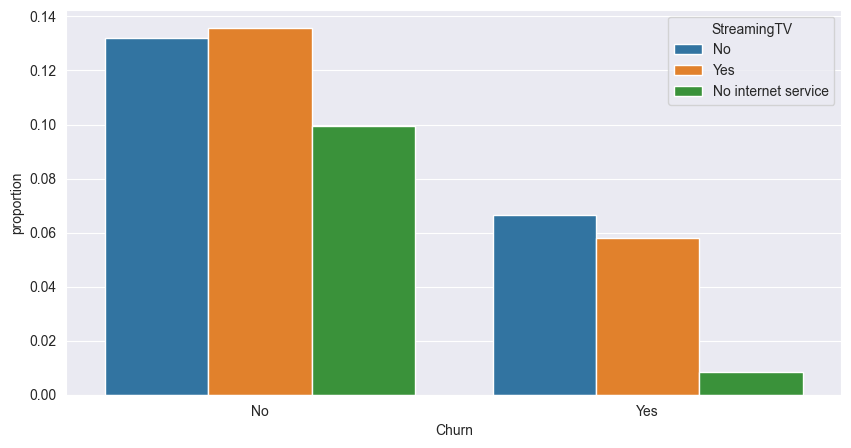

In [92]:
plt.figure(figsize=(10, 5))
sns.countplot(data=pd.concat([X_train, y_train]), x='Churn', hue='StreamingTV', stat='proportion')
plt.show()

In [93]:
X_train.head(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,TechSupport,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,DeviceProtection_No internet service,DeviceProtection_Yes
2142,0,0,0,0,21,1,1,0,2,2,...,Yes,One year,No,Mailed check,64.85,1336.80,0,0,0,1
1623,0,0,0,1,54,1,2,2,0,2,...,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,0,1,0,0
6074,1,0,1,1,1,0,1,2,2,2,...,No,Month-to-month,Yes,Electronic check,23.45,23.45,1,0,0,0
1362,1,0,0,1,4,1,2,2,2,2,...,No,Month-to-month,Yes,Electronic check,70.20,237.95,0,0,0,0
6754,1,0,0,0,0,1,1,0,0,0,...,No,Two year,Yes,Bank transfer (automatic),61.90,1410.80,0,1,0,0
1212,1,0,0,1,7,1,2,2,2,2,...,No,Month-to-month,Yes,Electronic check,69.55,521.35,0,0,0,0
2722,1,0,1,0,32,1,0,1,1,1,...,No internet service,Two year,No,Mailed check,18.95,613.95,0,0,1,0
4006,1,0,1,0,72,1,0,1,1,1,...,No internet service,Two year,Yes,Credit card (automatic),19.80,1414.65,0,0,1,0
6791,1,0,0,1,19,0,1,2,2,2,...,No,Month-to-month,Yes,Electronic check,39.65,733.35,1,0,0,1
5466,1,0,0,0,10,1,0,1,1,1,...,No internet service,One year,Yes,Bank transfer (automatic),19.95,219.50,0,0,1,0


In [94]:
X_train.tail(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,TechSupport,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,DeviceProtection_No internet service,DeviceProtection_Yes
5334,0,0,1,0,49,1,2,2,0,0,...,Yes,Two year,Yes,Bank transfer (automatic),107.95,5293.20,0,1,0,1
466,1,1,1,1,64,1,2,2,2,0,...,Yes,Two year,No,Electronic check,102.10,6538.45,0,1,0,1
6265,0,0,0,1,2,1,1,2,2,2,...,No,Month-to-month,Yes,Mailed check,45.25,74.20,0,0,0,0
5734,1,0,1,0,72,1,1,0,0,0,...,Yes,Two year,Yes,Mailed check,89.40,6376.55,0,1,0,1
3092,0,0,0,1,1,0,1,2,2,2,...,No,Month-to-month,Yes,Mailed check,25.10,25.10,1,0,0,0
3772,1,0,1,1,1,1,2,0,2,2,...,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,0,0,0,0
5191,0,0,1,0,23,1,1,0,0,0,...,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,0,1,0,1
5226,1,0,1,0,12,1,0,1,1,1,...,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,0,0,1,0
5390,1,1,0,1,12,1,2,2,2,2,...,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,0,1,0,1
860,1,0,0,1,26,1,0,1,1,1,...,No internet service,One year,No,Credit card (automatic),19.80,457.30,0,0,1,0


In [95]:
ordinalEncoder = OrdinalEncoder(dtype=int, categories=[['No internet service', 'Yes', 'No']])
X_train['StreamingTV'] = ordinalEncoder.fit_transform(X=X_train['StreamingTV'].to_numpy().reshape(-1, 1), y=y_train)
X_test['StreamingTV'] = ordinalEncoder.transform(X=X_test['StreamingTV'].to_numpy().reshape(-1, 1))

In [96]:
X_train.head(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,TechSupport,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,DeviceProtection_No internet service,DeviceProtection_Yes
2142,0,0,0,0,21,1,1,0,2,2,...,Yes,One year,No,Mailed check,64.85,1336.80,0,0,0,1
1623,0,0,0,1,54,1,2,2,0,2,...,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,0,1,0,0
6074,1,0,1,1,1,0,1,2,2,2,...,No,Month-to-month,Yes,Electronic check,23.45,23.45,1,0,0,0
1362,1,0,0,1,4,1,2,2,2,2,...,No,Month-to-month,Yes,Electronic check,70.20,237.95,0,0,0,0
6754,1,0,0,0,0,1,1,0,0,0,...,No,Two year,Yes,Bank transfer (automatic),61.90,1410.80,0,1,0,0
1212,1,0,0,1,7,1,2,2,2,2,...,No,Month-to-month,Yes,Electronic check,69.55,521.35,0,0,0,0
2722,1,0,1,0,32,1,0,1,1,1,...,No internet service,Two year,No,Mailed check,18.95,613.95,0,0,1,0
4006,1,0,1,0,72,1,0,1,1,1,...,No internet service,Two year,Yes,Credit card (automatic),19.80,1414.65,0,0,1,0
6791,1,0,0,1,19,0,1,2,2,2,...,No,Month-to-month,Yes,Electronic check,39.65,733.35,1,0,0,1
5466,1,0,0,0,10,1,0,1,1,1,...,No internet service,One year,Yes,Bank transfer (automatic),19.95,219.50,0,0,1,0


In [97]:
X_train.tail(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,TechSupport,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,DeviceProtection_No internet service,DeviceProtection_Yes
5334,0,0,1,0,49,1,2,2,0,0,...,Yes,Two year,Yes,Bank transfer (automatic),107.95,5293.20,0,1,0,1
466,1,1,1,1,64,1,2,2,2,0,...,Yes,Two year,No,Electronic check,102.10,6538.45,0,1,0,1
6265,0,0,0,1,2,1,1,2,2,2,...,No,Month-to-month,Yes,Mailed check,45.25,74.20,0,0,0,0
5734,1,0,1,0,72,1,1,0,0,0,...,Yes,Two year,Yes,Mailed check,89.40,6376.55,0,1,0,1
3092,0,0,0,1,1,0,1,2,2,2,...,No,Month-to-month,Yes,Mailed check,25.10,25.10,1,0,0,0
3772,1,0,1,1,1,1,2,0,2,2,...,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,0,0,0,0
5191,0,0,1,0,23,1,1,0,0,0,...,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,0,1,0,1
5226,1,0,1,0,12,1,0,1,1,1,...,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,0,0,1,0
5390,1,1,0,1,12,1,2,2,2,2,...,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,0,1,0,1
860,1,0,0,1,26,1,0,1,1,1,...,No internet service,One year,No,Credit card (automatic),19.80,457.30,0,0,1,0


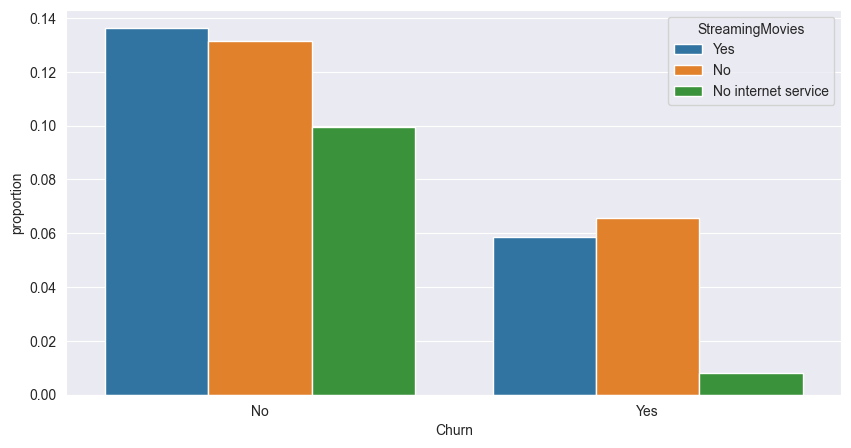

In [98]:
plt.figure(figsize=(10, 5))
sns.countplot(data=pd.concat([X_train, y_train]), x='Churn', hue='StreamingMovies', stat='proportion')
plt.show()

In [99]:
X_train.head(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,TechSupport,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,DeviceProtection_No internet service,DeviceProtection_Yes
2142,0,0,0,0,21,1,1,0,2,2,...,Yes,One year,No,Mailed check,64.85,1336.80,0,0,0,1
1623,0,0,0,1,54,1,2,2,0,2,...,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,0,1,0,0
6074,1,0,1,1,1,0,1,2,2,2,...,No,Month-to-month,Yes,Electronic check,23.45,23.45,1,0,0,0
1362,1,0,0,1,4,1,2,2,2,2,...,No,Month-to-month,Yes,Electronic check,70.20,237.95,0,0,0,0
6754,1,0,0,0,0,1,1,0,0,0,...,No,Two year,Yes,Bank transfer (automatic),61.90,1410.80,0,1,0,0
1212,1,0,0,1,7,1,2,2,2,2,...,No,Month-to-month,Yes,Electronic check,69.55,521.35,0,0,0,0
2722,1,0,1,0,32,1,0,1,1,1,...,No internet service,Two year,No,Mailed check,18.95,613.95,0,0,1,0
4006,1,0,1,0,72,1,0,1,1,1,...,No internet service,Two year,Yes,Credit card (automatic),19.80,1414.65,0,0,1,0
6791,1,0,0,1,19,0,1,2,2,2,...,No,Month-to-month,Yes,Electronic check,39.65,733.35,1,0,0,1
5466,1,0,0,0,10,1,0,1,1,1,...,No internet service,One year,Yes,Bank transfer (automatic),19.95,219.50,0,0,1,0


In [100]:
X_train.tail(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,TechSupport,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,DeviceProtection_No internet service,DeviceProtection_Yes
5334,0,0,1,0,49,1,2,2,0,0,...,Yes,Two year,Yes,Bank transfer (automatic),107.95,5293.20,0,1,0,1
466,1,1,1,1,64,1,2,2,2,0,...,Yes,Two year,No,Electronic check,102.10,6538.45,0,1,0,1
6265,0,0,0,1,2,1,1,2,2,2,...,No,Month-to-month,Yes,Mailed check,45.25,74.20,0,0,0,0
5734,1,0,1,0,72,1,1,0,0,0,...,Yes,Two year,Yes,Mailed check,89.40,6376.55,0,1,0,1
3092,0,0,0,1,1,0,1,2,2,2,...,No,Month-to-month,Yes,Mailed check,25.10,25.10,1,0,0,0
3772,1,0,1,1,1,1,2,0,2,2,...,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,0,0,0,0
5191,0,0,1,0,23,1,1,0,0,0,...,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,0,1,0,1
5226,1,0,1,0,12,1,0,1,1,1,...,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,0,0,1,0
5390,1,1,0,1,12,1,2,2,2,2,...,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,0,1,0,1
860,1,0,0,1,26,1,0,1,1,1,...,No internet service,One year,No,Credit card (automatic),19.80,457.30,0,0,1,0


In [101]:
ordinalEncoder = OrdinalEncoder(dtype=int, categories=[['Yes', 'No internet service', 'No']])
X_train['StreamingMovies'] = ordinalEncoder.fit_transform(X=X_train['StreamingMovies'].to_numpy().reshape(-1, 1), y=y_train)
X_test['StreamingMovies'] = ordinalEncoder.transform(X=X_test['StreamingMovies'].to_numpy().reshape(-1, 1))

In [102]:
X_train.head(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,TechSupport,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,DeviceProtection_No internet service,DeviceProtection_Yes
2142,0,0,0,0,21,1,1,0,2,2,...,0,One year,No,Mailed check,64.85,1336.80,0,0,0,1
1623,0,0,0,1,54,1,2,2,0,2,...,0,Two year,Yes,Bank transfer (automatic),97.20,5129.45,0,1,0,0
6074,1,0,1,1,1,0,1,2,2,2,...,2,Month-to-month,Yes,Electronic check,23.45,23.45,1,0,0,0
1362,1,0,0,1,4,1,2,2,2,2,...,2,Month-to-month,Yes,Electronic check,70.20,237.95,0,0,0,0
6754,1,0,0,0,0,1,1,0,0,0,...,2,Two year,Yes,Bank transfer (automatic),61.90,1410.80,0,1,0,0
1212,1,0,0,1,7,1,2,2,2,2,...,2,Month-to-month,Yes,Electronic check,69.55,521.35,0,0,0,0
2722,1,0,1,0,32,1,0,1,1,1,...,1,Two year,No,Mailed check,18.95,613.95,0,0,1,0
4006,1,0,1,0,72,1,0,1,1,1,...,1,Two year,Yes,Credit card (automatic),19.80,1414.65,0,0,1,0
6791,1,0,0,1,19,0,1,2,2,2,...,2,Month-to-month,Yes,Electronic check,39.65,733.35,1,0,0,1
5466,1,0,0,0,10,1,0,1,1,1,...,1,One year,Yes,Bank transfer (automatic),19.95,219.50,0,0,1,0


In [103]:
X_train.tail(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,TechSupport,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,DeviceProtection_No internet service,DeviceProtection_Yes
5334,0,0,1,0,49,1,2,2,0,0,...,0,Two year,Yes,Bank transfer (automatic),107.95,5293.20,0,1,0,1
466,1,1,1,1,64,1,2,2,2,0,...,0,Two year,No,Electronic check,102.10,6538.45,0,1,0,1
6265,0,0,0,1,2,1,1,2,2,2,...,2,Month-to-month,Yes,Mailed check,45.25,74.20,0,0,0,0
5734,1,0,1,0,72,1,1,0,0,0,...,0,Two year,Yes,Mailed check,89.40,6376.55,0,1,0,1
3092,0,0,0,1,1,0,1,2,2,2,...,2,Month-to-month,Yes,Mailed check,25.10,25.10,1,0,0,0
3772,1,0,1,1,1,1,2,0,2,2,...,0,Month-to-month,Yes,Electronic check,95.00,95.00,0,0,0,0
5191,0,0,1,0,23,1,1,0,0,0,...,0,Two year,Yes,Credit card (automatic),91.10,2198.30,0,1,0,1
5226,1,0,1,0,12,1,0,1,1,1,...,1,Month-to-month,Yes,Electronic check,21.15,306.05,0,0,1,0
5390,1,1,0,1,12,1,2,2,2,2,...,0,Month-to-month,Yes,Electronic check,99.45,1200.15,0,1,0,1
860,1,0,0,1,26,1,0,1,1,1,...,1,One year,No,Credit card (automatic),19.80,457.30,0,0,1,0


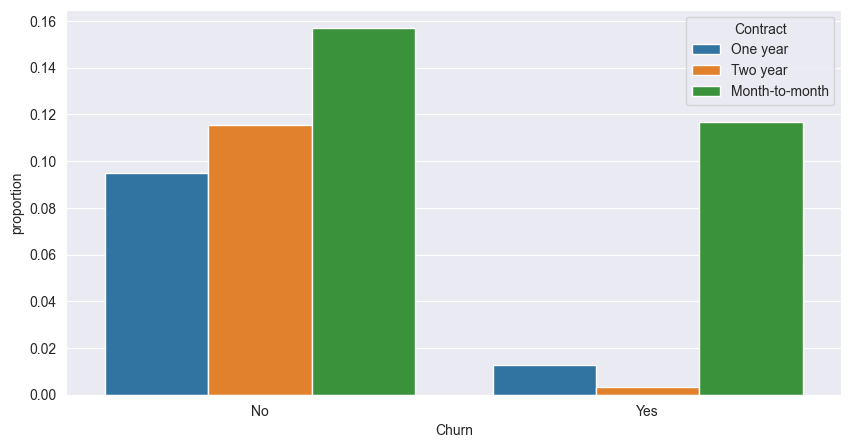

In [104]:
plt.figure(figsize=(10, 5))
sns.countplot(data=pd.concat([X_train, y_train]), x='Churn', hue='Contract', stat='proportion')
plt.show()

In [107]:
X_train.head(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,TechSupport,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,DeviceProtection_No internet service,DeviceProtection_Yes
2142,0,0,0,0,21,1,1,0,2,2,...,0,One year,No,Mailed check,64.85,1336.80,0,0,0,1
1623,0,0,0,1,54,1,2,2,0,2,...,0,Two year,Yes,Bank transfer (automatic),97.20,5129.45,0,1,0,0
6074,1,0,1,1,1,0,1,2,2,2,...,2,Month-to-month,Yes,Electronic check,23.45,23.45,1,0,0,0
1362,1,0,0,1,4,1,2,2,2,2,...,2,Month-to-month,Yes,Electronic check,70.20,237.95,0,0,0,0
6754,1,0,0,0,0,1,1,0,0,0,...,2,Two year,Yes,Bank transfer (automatic),61.90,1410.80,0,1,0,0
1212,1,0,0,1,7,1,2,2,2,2,...,2,Month-to-month,Yes,Electronic check,69.55,521.35,0,0,0,0
2722,1,0,1,0,32,1,0,1,1,1,...,1,Two year,No,Mailed check,18.95,613.95,0,0,1,0
4006,1,0,1,0,72,1,0,1,1,1,...,1,Two year,Yes,Credit card (automatic),19.80,1414.65,0,0,1,0
6791,1,0,0,1,19,0,1,2,2,2,...,2,Month-to-month,Yes,Electronic check,39.65,733.35,1,0,0,1
5466,1,0,0,0,10,1,0,1,1,1,...,1,One year,Yes,Bank transfer (automatic),19.95,219.50,0,0,1,0


In [108]:
X_train.tail(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,TechSupport,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,DeviceProtection_No internet service,DeviceProtection_Yes
5334,0,0,1,0,49,1,2,2,0,0,...,0,Two year,Yes,Bank transfer (automatic),107.95,5293.20,0,1,0,1
466,1,1,1,1,64,1,2,2,2,0,...,0,Two year,No,Electronic check,102.10,6538.45,0,1,0,1
6265,0,0,0,1,2,1,1,2,2,2,...,2,Month-to-month,Yes,Mailed check,45.25,74.20,0,0,0,0
5734,1,0,1,0,72,1,1,0,0,0,...,0,Two year,Yes,Mailed check,89.40,6376.55,0,1,0,1
3092,0,0,0,1,1,0,1,2,2,2,...,2,Month-to-month,Yes,Mailed check,25.10,25.10,1,0,0,0
3772,1,0,1,1,1,1,2,0,2,2,...,0,Month-to-month,Yes,Electronic check,95.00,95.00,0,0,0,0
5191,0,0,1,0,23,1,1,0,0,0,...,0,Two year,Yes,Credit card (automatic),91.10,2198.30,0,1,0,1
5226,1,0,1,0,12,1,0,1,1,1,...,1,Month-to-month,Yes,Electronic check,21.15,306.05,0,0,1,0
5390,1,1,0,1,12,1,2,2,2,2,...,0,Month-to-month,Yes,Electronic check,99.45,1200.15,0,1,0,1
860,1,0,0,1,26,1,0,1,1,1,...,1,One year,No,Credit card (automatic),19.80,457.30,0,0,1,0


In [109]:
ordinalEncoder = OrdinalEncoder(dtype=int, categories=[['Two year', 'One year', 'Month-to-month']])
X_train['Contract'] = ordinalEncoder.fit_transform(X=X_train['Contract'].to_numpy().reshape(-1, 1), y=y_train)
X_test['Contract'] = ordinalEncoder.transform(X=X_test['Contract'].to_numpy().reshape(-1, 1))

In [110]:
X_train.head(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,TechSupport,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,DeviceProtection_No internet service,DeviceProtection_Yes
2142,0,0,0,0,21,1,1,0,2,2,...,0,1,No,Mailed check,64.85,1336.80,0,0,0,1
1623,0,0,0,1,54,1,2,2,0,2,...,0,0,Yes,Bank transfer (automatic),97.20,5129.45,0,1,0,0
6074,1,0,1,1,1,0,1,2,2,2,...,2,2,Yes,Electronic check,23.45,23.45,1,0,0,0
1362,1,0,0,1,4,1,2,2,2,2,...,2,2,Yes,Electronic check,70.20,237.95,0,0,0,0
6754,1,0,0,0,0,1,1,0,0,0,...,2,0,Yes,Bank transfer (automatic),61.90,1410.80,0,1,0,0
1212,1,0,0,1,7,1,2,2,2,2,...,2,2,Yes,Electronic check,69.55,521.35,0,0,0,0
2722,1,0,1,0,32,1,0,1,1,1,...,1,0,No,Mailed check,18.95,613.95,0,0,1,0
4006,1,0,1,0,72,1,0,1,1,1,...,1,0,Yes,Credit card (automatic),19.80,1414.65,0,0,1,0
6791,1,0,0,1,19,0,1,2,2,2,...,2,2,Yes,Electronic check,39.65,733.35,1,0,0,1
5466,1,0,0,0,10,1,0,1,1,1,...,1,1,Yes,Bank transfer (automatic),19.95,219.50,0,0,1,0


In [111]:
X_train.tail(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,TechSupport,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,DeviceProtection_No internet service,DeviceProtection_Yes
5334,0,0,1,0,49,1,2,2,0,0,...,0,0,Yes,Bank transfer (automatic),107.95,5293.20,0,1,0,1
466,1,1,1,1,64,1,2,2,2,0,...,0,0,No,Electronic check,102.10,6538.45,0,1,0,1
6265,0,0,0,1,2,1,1,2,2,2,...,2,2,Yes,Mailed check,45.25,74.20,0,0,0,0
5734,1,0,1,0,72,1,1,0,0,0,...,0,0,Yes,Mailed check,89.40,6376.55,0,1,0,1
3092,0,0,0,1,1,0,1,2,2,2,...,2,2,Yes,Mailed check,25.10,25.10,1,0,0,0
3772,1,0,1,1,1,1,2,0,2,2,...,0,2,Yes,Electronic check,95.00,95.00,0,0,0,0
5191,0,0,1,0,23,1,1,0,0,0,...,0,0,Yes,Credit card (automatic),91.10,2198.30,0,1,0,1
5226,1,0,1,0,12,1,0,1,1,1,...,1,2,Yes,Electronic check,21.15,306.05,0,0,1,0
5390,1,1,0,1,12,1,2,2,2,2,...,0,2,Yes,Electronic check,99.45,1200.15,0,1,0,1
860,1,0,0,1,26,1,0,1,1,1,...,1,1,No,Credit card (automatic),19.80,457.30,0,0,1,0


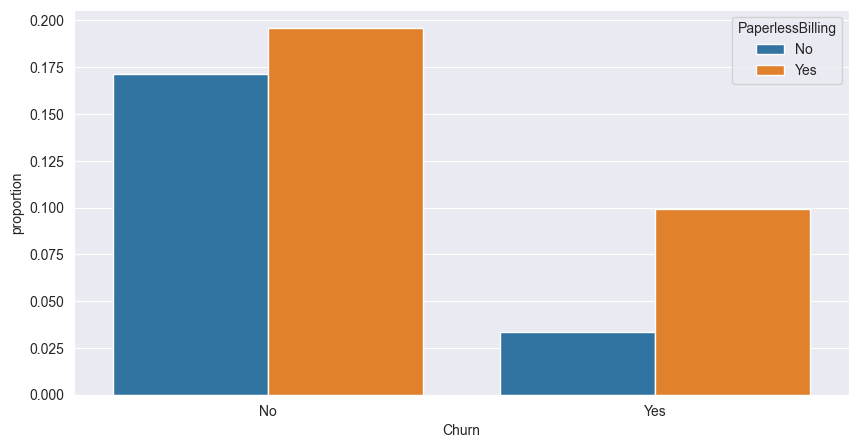

In [112]:
plt.figure(figsize=(10, 5))
sns.countplot(data=pd.concat([X_train, y_train]), x='Churn', hue='PaperlessBilling', stat='proportion')
plt.show()

In [113]:
X_train.head(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,TechSupport,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,DeviceProtection_No internet service,DeviceProtection_Yes
2142,0,0,0,0,21,1,1,0,2,2,...,0,1,No,Mailed check,64.85,1336.80,0,0,0,1
1623,0,0,0,1,54,1,2,2,0,2,...,0,0,Yes,Bank transfer (automatic),97.20,5129.45,0,1,0,0
6074,1,0,1,1,1,0,1,2,2,2,...,2,2,Yes,Electronic check,23.45,23.45,1,0,0,0
1362,1,0,0,1,4,1,2,2,2,2,...,2,2,Yes,Electronic check,70.20,237.95,0,0,0,0
6754,1,0,0,0,0,1,1,0,0,0,...,2,0,Yes,Bank transfer (automatic),61.90,1410.80,0,1,0,0
1212,1,0,0,1,7,1,2,2,2,2,...,2,2,Yes,Electronic check,69.55,521.35,0,0,0,0
2722,1,0,1,0,32,1,0,1,1,1,...,1,0,No,Mailed check,18.95,613.95,0,0,1,0
4006,1,0,1,0,72,1,0,1,1,1,...,1,0,Yes,Credit card (automatic),19.80,1414.65,0,0,1,0
6791,1,0,0,1,19,0,1,2,2,2,...,2,2,Yes,Electronic check,39.65,733.35,1,0,0,1
5466,1,0,0,0,10,1,0,1,1,1,...,1,1,Yes,Bank transfer (automatic),19.95,219.50,0,0,1,0


In [114]:
X_train.tail(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,TechSupport,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,DeviceProtection_No internet service,DeviceProtection_Yes
5334,0,0,1,0,49,1,2,2,0,0,...,0,0,Yes,Bank transfer (automatic),107.95,5293.20,0,1,0,1
466,1,1,1,1,64,1,2,2,2,0,...,0,0,No,Electronic check,102.10,6538.45,0,1,0,1
6265,0,0,0,1,2,1,1,2,2,2,...,2,2,Yes,Mailed check,45.25,74.20,0,0,0,0
5734,1,0,1,0,72,1,1,0,0,0,...,0,0,Yes,Mailed check,89.40,6376.55,0,1,0,1
3092,0,0,0,1,1,0,1,2,2,2,...,2,2,Yes,Mailed check,25.10,25.10,1,0,0,0
3772,1,0,1,1,1,1,2,0,2,2,...,0,2,Yes,Electronic check,95.00,95.00,0,0,0,0
5191,0,0,1,0,23,1,1,0,0,0,...,0,0,Yes,Credit card (automatic),91.10,2198.30,0,1,0,1
5226,1,0,1,0,12,1,0,1,1,1,...,1,2,Yes,Electronic check,21.15,306.05,0,0,1,0
5390,1,1,0,1,12,1,2,2,2,2,...,0,2,Yes,Electronic check,99.45,1200.15,0,1,0,1
860,1,0,0,1,26,1,0,1,1,1,...,1,1,No,Credit card (automatic),19.80,457.30,0,0,1,0


In [115]:
oneHotEncoder = OneHotEncoder(drop='first', sparse_output=False, dtype=int)
X_train['PaperlessBilling'] = oneHotEncoder.fit_transform(X=X_train['PaperlessBilling'].to_numpy().reshape(-1, 1))
X_test['PaperlessBilling'] = oneHotEncoder.transform(X=X_test['PaperlessBilling'].to_numpy().reshape(-1, 1))

In [116]:
X_train.head(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,TechSupport,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,DeviceProtection_No internet service,DeviceProtection_Yes
2142,0,0,0,0,21,1,1,0,2,2,...,0,1,0,Mailed check,64.85,1336.80,0,0,0,1
1623,0,0,0,1,54,1,2,2,0,2,...,0,0,1,Bank transfer (automatic),97.20,5129.45,0,1,0,0
6074,1,0,1,1,1,0,1,2,2,2,...,2,2,1,Electronic check,23.45,23.45,1,0,0,0
1362,1,0,0,1,4,1,2,2,2,2,...,2,2,1,Electronic check,70.20,237.95,0,0,0,0
6754,1,0,0,0,0,1,1,0,0,0,...,2,0,1,Bank transfer (automatic),61.90,1410.80,0,1,0,0
1212,1,0,0,1,7,1,2,2,2,2,...,2,2,1,Electronic check,69.55,521.35,0,0,0,0
2722,1,0,1,0,32,1,0,1,1,1,...,1,0,0,Mailed check,18.95,613.95,0,0,1,0
4006,1,0,1,0,72,1,0,1,1,1,...,1,0,1,Credit card (automatic),19.80,1414.65,0,0,1,0
6791,1,0,0,1,19,0,1,2,2,2,...,2,2,1,Electronic check,39.65,733.35,1,0,0,1
5466,1,0,0,0,10,1,0,1,1,1,...,1,1,1,Bank transfer (automatic),19.95,219.50,0,0,1,0


In [117]:
X_train.tail(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,TechSupport,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,DeviceProtection_No internet service,DeviceProtection_Yes
5334,0,0,1,0,49,1,2,2,0,0,...,0,0,1,Bank transfer (automatic),107.95,5293.20,0,1,0,1
466,1,1,1,1,64,1,2,2,2,0,...,0,0,0,Electronic check,102.10,6538.45,0,1,0,1
6265,0,0,0,1,2,1,1,2,2,2,...,2,2,1,Mailed check,45.25,74.20,0,0,0,0
5734,1,0,1,0,72,1,1,0,0,0,...,0,0,1,Mailed check,89.40,6376.55,0,1,0,1
3092,0,0,0,1,1,0,1,2,2,2,...,2,2,1,Mailed check,25.10,25.10,1,0,0,0
3772,1,0,1,1,1,1,2,0,2,2,...,0,2,1,Electronic check,95.00,95.00,0,0,0,0
5191,0,0,1,0,23,1,1,0,0,0,...,0,0,1,Credit card (automatic),91.10,2198.30,0,1,0,1
5226,1,0,1,0,12,1,0,1,1,1,...,1,2,1,Electronic check,21.15,306.05,0,0,1,0
5390,1,1,0,1,12,1,2,2,2,2,...,0,2,1,Electronic check,99.45,1200.15,0,1,0,1
860,1,0,0,1,26,1,0,1,1,1,...,1,1,0,Credit card (automatic),19.80,457.30,0,0,1,0


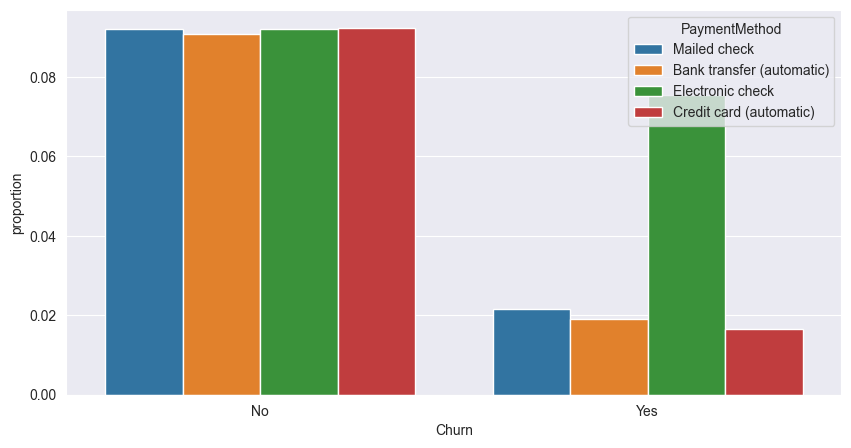

In [118]:
plt.figure(figsize=(10, 5))
sns.countplot(data=pd.concat([X_train, y_train]), x='Churn', hue='PaymentMethod', stat='proportion')
plt.show()

In [119]:
X_train.head(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,TechSupport,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,DeviceProtection_No internet service,DeviceProtection_Yes
2142,0,0,0,0,21,1,1,0,2,2,...,0,1,0,Mailed check,64.85,1336.80,0,0,0,1
1623,0,0,0,1,54,1,2,2,0,2,...,0,0,1,Bank transfer (automatic),97.20,5129.45,0,1,0,0
6074,1,0,1,1,1,0,1,2,2,2,...,2,2,1,Electronic check,23.45,23.45,1,0,0,0
1362,1,0,0,1,4,1,2,2,2,2,...,2,2,1,Electronic check,70.20,237.95,0,0,0,0
6754,1,0,0,0,0,1,1,0,0,0,...,2,0,1,Bank transfer (automatic),61.90,1410.80,0,1,0,0
1212,1,0,0,1,7,1,2,2,2,2,...,2,2,1,Electronic check,69.55,521.35,0,0,0,0
2722,1,0,1,0,32,1,0,1,1,1,...,1,0,0,Mailed check,18.95,613.95,0,0,1,0
4006,1,0,1,0,72,1,0,1,1,1,...,1,0,1,Credit card (automatic),19.80,1414.65,0,0,1,0
6791,1,0,0,1,19,0,1,2,2,2,...,2,2,1,Electronic check,39.65,733.35,1,0,0,1
5466,1,0,0,0,10,1,0,1,1,1,...,1,1,1,Bank transfer (automatic),19.95,219.50,0,0,1,0


In [120]:
X_train.tail(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,TechSupport,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,DeviceProtection_No internet service,DeviceProtection_Yes
5334,0,0,1,0,49,1,2,2,0,0,...,0,0,1,Bank transfer (automatic),107.95,5293.20,0,1,0,1
466,1,1,1,1,64,1,2,2,2,0,...,0,0,0,Electronic check,102.10,6538.45,0,1,0,1
6265,0,0,0,1,2,1,1,2,2,2,...,2,2,1,Mailed check,45.25,74.20,0,0,0,0
5734,1,0,1,0,72,1,1,0,0,0,...,0,0,1,Mailed check,89.40,6376.55,0,1,0,1
3092,0,0,0,1,1,0,1,2,2,2,...,2,2,1,Mailed check,25.10,25.10,1,0,0,0
3772,1,0,1,1,1,1,2,0,2,2,...,0,2,1,Electronic check,95.00,95.00,0,0,0,0
5191,0,0,1,0,23,1,1,0,0,0,...,0,0,1,Credit card (automatic),91.10,2198.30,0,1,0,1
5226,1,0,1,0,12,1,0,1,1,1,...,1,2,1,Electronic check,21.15,306.05,0,0,1,0
5390,1,1,0,1,12,1,2,2,2,2,...,0,2,1,Electronic check,99.45,1200.15,0,1,0,1
860,1,0,0,1,26,1,0,1,1,1,...,1,1,0,Credit card (automatic),19.80,457.30,0,0,1,0


In [121]:
oneHotEncoder = OneHotEncoder(drop='first', sparse_output=False, dtype=int)
encoded_train_payment_method = oneHotEncoder.fit_transform(X=X_train['PaymentMethod'].to_numpy().reshape(-1, 1), y=y_train)
encoded_train_payment_method_df = pd.DataFrame(encoded_train_payment_method, columns=oneHotEncoder.get_feature_names_out(['PaymentMethod']), index=X_train.index)
X_train = pd.concat([X_train, encoded_train_payment_method_df], axis=1).drop(['PaymentMethod'], axis=1)

encoded_test_payment_method = oneHotEncoder.transform(X=X_test['PaymentMethod'].to_numpy().reshape(-1, 1))
encoded_test_payment_method_df = pd.DataFrame(encoded_test_payment_method, columns=oneHotEncoder.get_feature_names_out(['PaymentMethod']), index=X_test.index)
X_test = pd.concat([X_test, encoded_test_payment_method_df], axis=1).drop(['PaymentMethod'], axis=1)

In [122]:
X_train.head(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,TechSupport,...,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2142,0,0,0,0,21,1,1,0,2,2,...,0,64.85,1336.80,0,0,0,1,0,0,1
1623,0,0,0,1,54,1,2,2,0,2,...,1,97.20,5129.45,0,1,0,0,0,0,0
6074,1,0,1,1,1,0,1,2,2,2,...,1,23.45,23.45,1,0,0,0,0,1,0
1362,1,0,0,1,4,1,2,2,2,2,...,1,70.20,237.95,0,0,0,0,0,1,0
6754,1,0,0,0,0,1,1,0,0,0,...,1,61.90,1410.80,0,1,0,0,0,0,0
1212,1,0,0,1,7,1,2,2,2,2,...,1,69.55,521.35,0,0,0,0,0,1,0
2722,1,0,1,0,32,1,0,1,1,1,...,0,18.95,613.95,0,0,1,0,0,0,1
4006,1,0,1,0,72,1,0,1,1,1,...,1,19.80,1414.65,0,0,1,0,1,0,0
6791,1,0,0,1,19,0,1,2,2,2,...,1,39.65,733.35,1,0,0,1,0,1,0
5466,1,0,0,0,10,1,0,1,1,1,...,1,19.95,219.50,0,0,1,0,0,0,0


In [123]:
X_train.tail(n=10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,TechSupport,...,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5334,0,0,1,0,49,1,2,2,0,0,...,1,107.95,5293.20,0,1,0,1,0,0,0
466,1,1,1,1,64,1,2,2,2,0,...,0,102.10,6538.45,0,1,0,1,0,1,0
6265,0,0,0,1,2,1,1,2,2,2,...,1,45.25,74.20,0,0,0,0,0,0,1
5734,1,0,1,0,72,1,1,0,0,0,...,1,89.40,6376.55,0,1,0,1,0,0,1
3092,0,0,0,1,1,0,1,2,2,2,...,1,25.10,25.10,1,0,0,0,0,0,1
3772,1,0,1,1,1,1,2,0,2,2,...,1,95.00,95.00,0,0,0,0,0,1,0
5191,0,0,1,0,23,1,1,0,0,0,...,1,91.10,2198.30,0,1,0,1,1,0,0
5226,1,0,1,0,12,1,0,1,1,1,...,1,21.15,306.05,0,0,1,0,0,1,0
5390,1,1,0,1,12,1,2,2,2,2,...,1,99.45,1200.15,0,1,0,1,0,1,0
860,1,0,0,1,26,1,0,1,1,1,...,0,19.80,457.30,0,0,1,0,1,0,0


In [124]:
y_train.unique()

array(['No', 'Yes'], dtype=object)

In [125]:
y_train

2142     No
1623     No
6074    Yes
1362    Yes
6754     No
       ... 
3772    Yes
5191     No
5226     No
5390    Yes
860      No
Name: Churn, Length: 5634, dtype: object

In [126]:
labelEncoder = LabelEncoder()
# Fit and transform the training data in place
y_train[:] = labelEncoder.fit_transform(y_train)
y_train = y_train.apply(lambda target_class: int(target_class))

# Transform the test data in place using the same encoder
y_test[:] = labelEncoder.transform(y_test)
y_test = y_test.apply(lambda target_class: int(target_class))

In [127]:
y_train

2142    0
1623    0
6074    1
1362    1
6754    0
       ..
3772    1
5191    0
5226    0
5390    1
860     0
Name: Churn, Length: 5634, dtype: int64

In [129]:
gaussian_naive_bayes = GaussianNB()
multinomial_naive_bayes = MultinomialNB()
bernoulli_naive_bayes = BernoulliNB()

In [130]:
gaussian_naive_bayes.fit(X_train, y_train)
multinomial_naive_bayes.fit(X_train, y_train)
bernoulli_naive_bayes.fit(X_train, y_train)

BernoulliNB()

In [131]:
y_hat_gaussian_naive_bayes = gaussian_naive_bayes.predict(X_test)
y_hat_multinomial_naive_bayes = multinomial_naive_bayes.predict(X_test)
y_hat_bernoulli_naive_bayes = bernoulli_naive_bayes.predict(X_test)

In [132]:
results_table = pd.DataFrame(columns=['ML Model', 'Accuracy'])

In [133]:
models = [
    {'model': 'GaussianNaiveBayes', 'y_hat': y_hat_gaussian_naive_bayes},
    {'model': 'MultinomialNaiveBayes', 'y_hat': y_hat_multinomial_naive_bayes},
    {'model': 'BernoulliNaiveBayes', 'y_hat': y_hat_bernoulli_naive_bayes}
]

In [134]:
for i, model in enumerate(models):
    accuracy = accuracy_score(y_test, model['y_hat'])
    # results_table.loc[i] = [model['model'], accuracy]
    results_table = pd.concat([results_table, pd.DataFrame([[model['model'], accuracy]], columns=results_table.columns)], ignore_index=True)
results_table

C:\Users\user\AppData\Local\Temp\ipykernel_16888\1796899057.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_table = pd.concat([results_table, pd.DataFrame([[model['model'], accuracy]], columns=results_table.columns)], ignore_index=True)


,ML Model,Accuracy
0,GaussianNaiveBayes,0.748048
1,MultinomialNaiveBayes,0.660043
2,BernoulliNaiveBayes,0.747339


As it may be seen, Gaussian Naive Bayes performed best, and Multinomial Naive Bayes performed worst. I suppose this is due to the fact that:
* Gaussian Naive Bayes - is based on the probability of finding a sample in series based on mean and standard deviation. Also, it handles the best continuous values.
* Multinomial Naive Bayes - as it is described in documentation of sklearn, is used for multinomial distributed data and is used for tasks related to Text classification. At the same time, it is good at handling discrete values
* Bernoulli Naive Bayes - is based on the Bernoulli distribution, a special case of Binomial Distribution. However, it is required for all features to be binary, which
in my case are not. It handles well binary attributes